In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models,layers
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
train_df=pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')

In [2]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
train_df.shape

(8693, 14)

In [4]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [5]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
#We have lots of features which have missing values.

In [7]:
train_df.isnull().sum().sum()

2324

In [8]:
train_df.isnull().sum()/train_df.shape[0]*100

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64

In [9]:
train_df['CryoSleep'].value_counts()

False    5439
True     3037
Name: CryoSleep, dtype: int64

In [10]:
train_df['HomePlanet'] = train_df['HomePlanet'].fillna(train_df['HomePlanet'].mode()[0])
train_df['CryoSleep'] = train_df['CryoSleep'].fillna(train_df['CryoSleep'].mode()[0])
train_df['Destination']=train_df['Destination'].fillna(train_df['Destination'].mode()[0])
train_df['Age']=train_df['Age'].fillna(train_df['Age'].median())
train_df['VIP']=train_df['VIP'].fillna(train_df['VIP'].mode()[0])
train_df['RoomService']=train_df['RoomService'].fillna(train_df['RoomService'].median())
train_df['FoodCourt']=train_df['FoodCourt'].fillna(train_df['FoodCourt'].median())
train_df['ShoppingMall']=train_df['ShoppingMall'].fillna(train_df['ShoppingMall'].median())
train_df['Spa']=train_df['Spa'].fillna(train_df['Spa'].median())
train_df['VRDeck']=train_df['VRDeck'].fillna(train_df['VRDeck'].median())

In [11]:
train_df.shape

(8693, 14)

In [12]:
train_df = train_df.drop(columns=['PassengerId','Cabin','Name'],axis=1)
train_df.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False


In [13]:
train_df.isnull().sum().sum()

0

In [14]:
train_df.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False


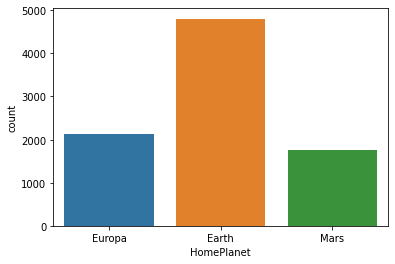

In [15]:
sns.countplot(train_df['HomePlanet'])
plt.show()

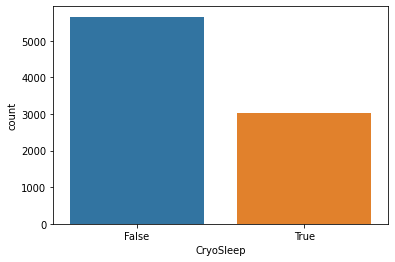

In [16]:
sns.countplot(train_df.CryoSleep)
plt.show()

In [17]:
train_df['Destination'].nunique()

3

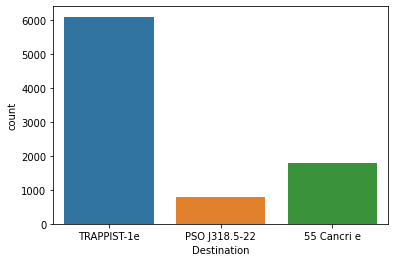

In [18]:
sns.countplot(train_df['Destination'])
plt.show()

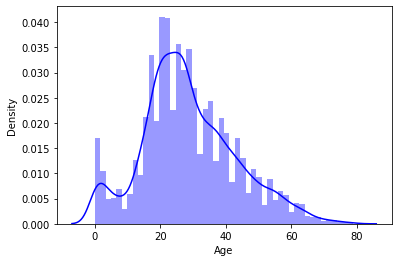

In [19]:
sns.distplot(train_df['Age'],color='blue')
plt.show()

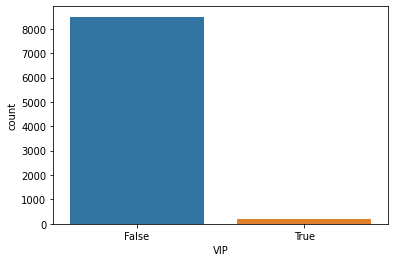

In [20]:
sns.countplot(train_df['VIP'])
plt.show()

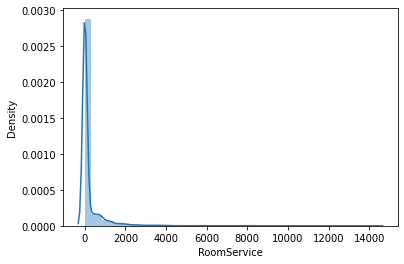

In [21]:
sns.distplot(train_df['RoomService'])
plt.show()

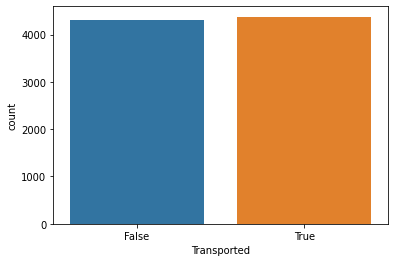

In [22]:
sns.countplot(train_df['Transported'])
plt.show()                       

In [23]:
train_cols=['HomePlanet','CryoSleep','Destination','VIP','Transported']
le=LabelEncoder()
for col in train_cols:
    train_df[col]=le.fit_transform(train_df[col])

In [24]:
train_df.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0


In [25]:
train_df.corr()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
HomePlanet,1.000000,0.083586,0.034737,0.133577,0.123512,0.211751,0.071454,0.101383,0.055047,0.039824,0.115461
CryoSleep,0.083586,1.000000,-0.096287,-0.071323,-0.078281,-0.244089,-0.205928,-0.207798,-0.198307,-0.192721,0.460132
Destination,0.034737,-0.096287,1.000000,-0.006771,-0.044707,0.045733,-0.111057,0.024721,-0.055815,-0.073293,-0.108152
Age,0.133577,-0.071323,-0.006771,1.000000,0.091863,0.068629,0.127390,0.033148,0.120946,0.099590,-0.074233
VIP,0.123512,-0.078281,-0.044707,0.091863,1.000000,0.056566,0.125499,0.018412,0.060991,0.123061,-0.037261
RoomService,0.211751,-0.244089,0.045733,0.068629,0.056566,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124
FoodCourt,0.071454,-0.205928,-0.111057,0.127390,0.125499,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583
ShoppingMall,0.101383,-0.207798,0.024721,0.033148,0.018412,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391
Spa,0.055047,-0.198307,-0.055815,0.120946,0.060991,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545
VRDeck,0.039824,-0.192721,-0.073293,0.099590,0.123061,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874


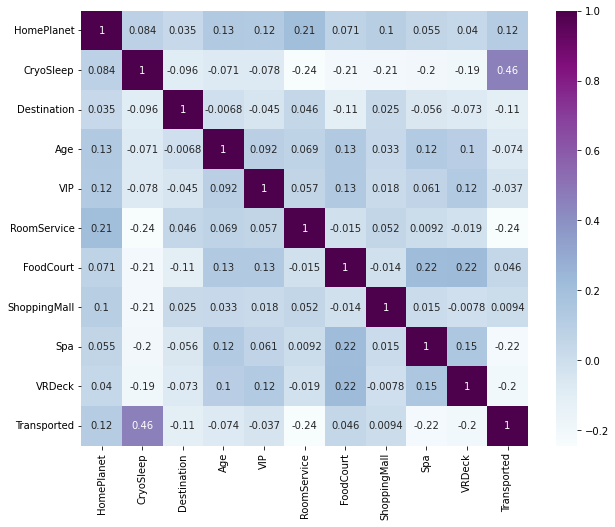

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(),annot=True,cmap='BuPu')
plt.show()

In [27]:
x=train_df.drop(columns='Transported',axis=1)
y=train_df['Transported']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [28]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6954, 10) (1739, 10) (6954,) (1739,)


In [29]:
x_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
4278,1,0,0,54.0,0,0.0,559.0,0.0,15238.0,2799.0
5971,0,0,2,20.0,0,0.0,20.0,1.0,696.0,0.0
464,2,0,2,43.0,0,1821.0,0.0,47.0,29.0,0.0
4475,0,0,2,24.0,0,185.0,0.0,476.0,1810.0,53.0
8469,1,1,0,25.0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4373,1,1,0,32.0,0,0.0,0.0,0.0,0.0,0.0
7891,0,0,2,22.0,0,0.0,0.0,6.0,0.0,733.0
4859,2,0,2,29.0,0,523.0,0.0,21.0,4.0,811.0
3264,0,0,2,0.0,0,0.0,0.0,0.0,0.0,0.0


In [30]:
y_test

3601    1
6057    1
2797    0
7110    0
8579    1
       ..
864     0
3780    0
6046    1
170     0
2519    1
Name: Transported, Length: 1739, dtype: int64

In [31]:
mmc=MinMaxScaler(feature_range=(0,1))
x_train=mmc.fit_transform(x_train)
x_test=mmc.transform(x_test)

In [32]:
x_train

array([[5.00000000e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 8.20482447e-01, 1.15982265e-01],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        4.25676826e-05, 3.74757700e-02, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        2.00068108e-03, 1.56149042e-03, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        8.93921335e-04, 2.15377988e-04, 3.36054365e-02],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 4.61447340e-02, 6.62992583e-04]])

In [33]:
x_test

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.65196663e-02, 2.15377988e-03, 8.66034061e-03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.28128725e-02, 3.23066983e-03, 1.65748146e-04],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        3.40541461e-04, 5.77213009e-02, 0.00000000e+00],
       [5.00000000e-01, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.04458324e-02, 2.11328886e-02]])

In [34]:
rfg=RandomForestClassifier(n_estimators=200,criterion='entropy')
rfg.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [35]:
y_pred1=rfg.predict(x_test)

In [36]:
y_pred1[:5]

array([0, 1, 0, 0, 1])

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred1)

0.7768832662449684

In [38]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[663, 200],
       [188, 688]])

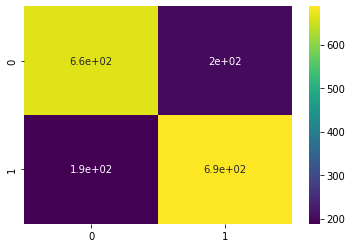

In [39]:
sns.heatmap(cm,annot=True,cmap='viridis')
plt.show()

In [40]:
xgb=XGBClassifier(n_estimators=200,learning_rate=0.001)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [41]:
y_pred2=xgb.predict(x_test)
y_pred2[:5]

array([0, 1, 0, 0, 1])

In [42]:
accuracy_score(y_test,y_pred2)

0.7751581368602645

In [43]:
#Applying neural network

In [44]:
ann=models.Sequential([
    
    layers.Dense(101,activation='relu',input_shape=(10,)),
    layers.Dense(72,activation='relu'),
    layers.Dense(49,activation='relu'),
    layers.Dense(31,activation='relu'),
    layers.Dense(7,activation='relu'),
    layers.Dense(1,activation='sigmoid')
    
                    ])

2022-06-25 15:52:55.541932: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [45]:
ann.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
ann.fit(x_train,y_train,batch_size=200,epochs=19)

2022-06-25 15:52:56.035232: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/19
35/35 [==============================] - 1s 4ms/step - loss: 0.6169 - accuracy: 0.6730
Epoch 2/19
35/35 [==============================] - 0s 4ms/step - loss: 0.5544 - accuracy: 0.7370
Epoch 3/19
35/35 [==============================] - 0s 4ms/step - loss: 0.5148 - accuracy: 0.7512
Epoch 4/19
35/35 [==============================] - 0s 4ms/step - loss: 0.4910 - accuracy: 0.7629
Epoch 5/19
35/35 [==============================] - 0s 4ms/step - loss: 0.4738 - accuracy: 0.7761
Epoch 6/19
35/35 [==============================] - 0s 5ms/step - loss: 0.4634 - accuracy: 0.7767
Epoch 7/19
35/35 [==============================] - 0s 4ms/step - loss: 0.4581 - accuracy: 0.7762
Epoch 8/19
35/35 [==============================] - 0s 4ms/step - loss: 0.4491 - accuracy: 0.7816
Epoch 9/19
35/35 [==============================] - 0s 4ms/step - loss: 0.4457 - accuracy: 0.7875
Epoch 10/19
35/35 [==============================] - 0s 4ms/step - loss: 0.4465 - accuracy: 0.7846
Epoch 11/19
35/35 [

In [46]:
y_pred3=ann.predict(x_test)

In [47]:
y_pred3[:5]

array([[0.46004936],
       [0.53609264],
       [0.19056907],
       [0.24309641],
       [0.99734247]], dtype=float32)

In [48]:
y_pred3=(y_pred3>0.5)
y_pred3[:5]

array([[False],
       [ True],
       [False],
       [False],
       [ True]])

In [49]:
y_pred3=le.fit_transform(y_pred3)

In [50]:
y_pred3

array([0, 1, 0, ..., 1, 0, 0])

In [51]:
accuracy_score(y_test,y_pred3)


0.7814836112708453

In [52]:
test_df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [53]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [54]:
test=test_df.copy()

In [55]:
test_df=test_df.drop(columns=['PassengerId','Cabin','Name'],axis=1)
test_df.head(1)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0


In [56]:
test_df['HomePlanet']=test_df['HomePlanet'].fillna(test_df['HomePlanet'].mode()[0])
test_df['CryoSleep']=test_df['CryoSleep'].fillna(test_df['CryoSleep'].mode()[0])
test_df['Destination']=test_df['Destination'].fillna(test_df['Destination'].mode()[0])
test_df['Age']=test_df['Age'].fillna(test_df['Age'].median())
test_df['VIP']=test_df['VIP'].fillna(test_df['VIP'].mode()[0])
test_df['RoomService']=test_df['RoomService'].fillna(test_df['RoomService'].median())
test_df['FoodCourt']=test_df['FoodCourt'].fillna(test_df['FoodCourt'].median())
test_df['ShoppingMall']=test_df['ShoppingMall'].fillna(test_df['ShoppingMall'].median())
test_df['Spa']=test_df['Spa'].fillna(test_df['Spa'].median())
test_df['VRDeck']=test_df['VRDeck'].fillna(test_df['VRDeck'].median())

In [57]:
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [58]:
test_cols=['HomePlanet','CryoSleep','Destination','VIP']
for col in test_cols:
    test_df[col]=le.fit_transform(test_df[col])

In [59]:
test_df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0


In [60]:
test_df=mmc.transform(test_df)

In [61]:
test_df

array([[0.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.15200302,
        0.        ],
       [0.5       , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.5       , 0.        , 1.        , ..., 0.        , 0.        ,
        0.02167157],
       [0.        , 1.        , 0.5       , ..., 0.        , 0.        ,
        0.        ]])

In [62]:
x=mmc.fit_transform(x)
x

array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        1.06419207e-03, 2.45001785e-02, 1.82322960e-03],
       [5.00000000e-01, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 2.99669761e-01, 2.03041478e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00, ...,
        7.96867019e-02, 4.46269190e-05, 0.00000000e+00],
       [5.00000000e-01, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.57533024e-02, 1.34048813e-01],
       [5.00000000e-01, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 4.97244437e-04]])

In [63]:
nn=models.Sequential([
    
    layers.Dense(1010,activation='relu',input_shape=(10,)),
    layers.Dense(720,activation='relu'),
    layers.Dense(490,activation='relu'),
    layers.Dense(310,activation='relu'),
    layers.Dense(79,activation='relu'),
    layers.Dense(23,activation='relu'),
    layers.Dense(1,activation='sigmoid')
    
                    ])

In [64]:
nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
nn.fit(x,y,batch_size=50,epochs=50)

Epoch 1/50
174/174 [==============================] - 3s 11ms/step - loss: 0.5251 - accuracy: 0.7443
Epoch 2/50
174/174 [==============================] - 2s 11ms/step - loss: 0.4597 - accuracy: 0.7821
Epoch 3/50
174/174 [==============================] - 2s 10ms/step - loss: 0.4442 - accuracy: 0.7882
Epoch 4/50
174/174 [==============================] - 2s 10ms/step - loss: 0.4409 - accuracy: 0.7866
Epoch 5/50
174/174 [==============================] - 2s 11ms/step - loss: 0.4380 - accuracy: 0.7886
Epoch 6/50
174/174 [==============================] - 2s 11ms/step - loss: 0.4358 - accuracy: 0.7913
Epoch 7/50
174/174 [==============================] - 2s 11ms/step - loss: 0.4347 - accuracy: 0.7927
Epoch 8/50
174/174 [==============================] - 2s 11ms/step - loss: 0.4320 - accuracy: 0.7904
Epoch 9/50
174/174 [==============================] - 2s 11ms/step - loss: 0.4323 - accuracy: 0.7904
Epoch 10/50
174/174 [==============================] - 2s 11ms/step - loss: 0.4310 - accura

In [65]:
y_pred=nn.predict(test_df)
y_pred[:10]

array([[0.62395376],
       [0.00463641],
       [0.98517716],
       [0.99649346],
       [0.4263718 ],
       [0.606798  ],
       [0.99210954],
       [0.9776939 ],
       [0.98824394],
       [0.50620216]], dtype=float32)

In [66]:
y_pred=(y_pred>0.5)
y_pred[:10]

array([[ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [67]:
y_pred=y_pred.reshape(-1,)
y_pred[:10]

array([ True, False,  True,  True, False,  True,  True,  True,  True,
        True])

In [68]:
submission=pd.DataFrame({'PassengerId':test['PassengerId'],'Transported':y_pred})

In [69]:
submission.to_csv('Titanic_spaceship_pred.csv',index=None)